In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

import tensorflow as tf

In [4]:
start = 0
end = 100000

range_values = np.arange(start, end)

# Create the digit representation as a 2D array
X = np.array([list(map(int, str(x).zfill(15))) for x in range_values])

# Create the labels using vectorized operations
y = np.column_stack((range_values % 2, (range_values + 1) % 2))

# Split data up into training and validation data.
split_train = StratifiedShuffleSplit(n_splits=3, test_size=0.4, train_size=0.6)
for train_index, test_index in split_train.split(X, y):
    X_val, X_train = X[test_index], X[train_index]
    y_val, y_train = y[test_index], y[train_index]

In [6]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 2]
 ...
 [0 0 0 ... 9 9 7]
 [0 0 0 ... 9 9 8]
 [0 0 0 ... 9 9 9]]


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(70, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [10]:
#model.evaluate(X_train, y_train)

In [11]:
#model.evaluate(X_val, y_val)

In [16]:
model.fit(X_train, y_train, batch_size=512, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9963 - loss: 0.0182 - val_accuracy: 1.0000 - val_loss: 2.5953e-04
Epoch 2/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9960 - loss: 0.0184 - val_accuracy: 1.0000 - val_loss: 2.6747e-04
Epoch 3/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9949 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 2.6058e-04
Epoch 4/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9947 - loss: 0.0205 - val_accuracy: 1.0000 - val_loss: 2.7355e-04
Epoch 5/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9954 - loss: 0.0194 - val_accuracy: 1.0000 - val_loss: 2.6894e-04
Epoch 6/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9952 - loss: 0.0219 - val_accuracy: 1.0000 - val_loss: 2.7101e-04
Epoch 7/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9950 - loss: 0.0204 - val_accuracy: 1.0000 - val_loss: 2.6480e-04
Epoch 8/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.99

KeyboardInterrupt: 

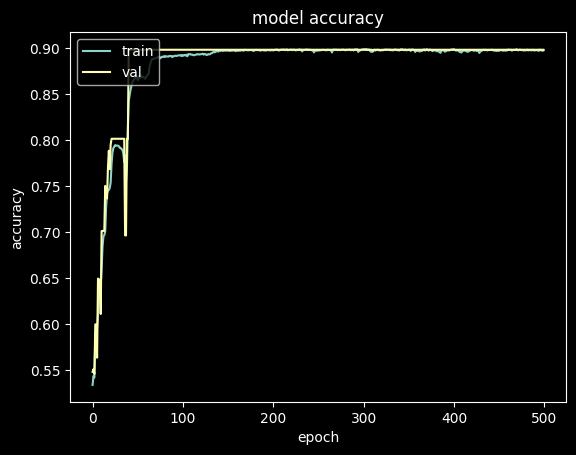

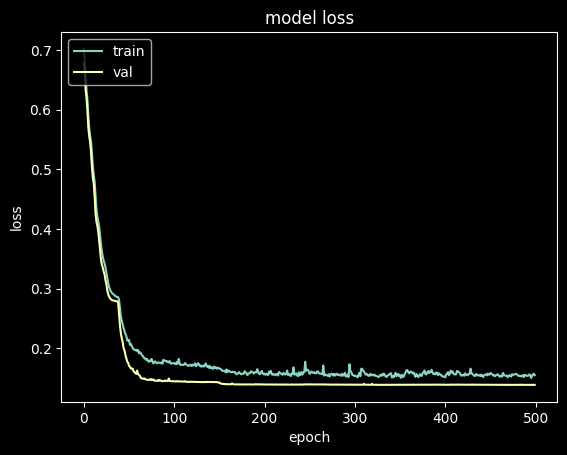

In [13]:
plt.style.use('dark_background')

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
print(f"maximum accurary of '{max(model.history.history['val_accuracy'])}' at epoch number {model.history.history['val_accuracy'].index(max(model.history.history['val_accuracy']))}")
print(f"mimimum loss of '{min(model.history.history['val_loss'])}' at epoch number {model.history.history['val_loss'].index(min(model.history.history['val_loss']))}")

maximum accurary of '0.8984000086784363' at epoch number 41
mimimum loss of '0.13873738050460815' at epoch number 355


In [ ]:
#model.save('model.keras')

In [23]:
def num_to_nparray(num):
    return np.array([list(map(int, str(num).zfill(15)))])

In [26]:
def predict_odd(num):
    prediction = model.predict(num_to_nparray(num))
    return prediction[0][0] > prediction[0][1]

In [22]:
#model.predict(num_to_nparray(32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[9.807897e-15, 1.000000e+00]], dtype=float32)

In [28]:
#predict_odd(33)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


True

In [ ]:
#import_model = tf.keras.models.load_model('model.keras')

In [ ]:
#import_model.predict(np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,1,1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([[1.00000e+00, 5.09781e-11]], dtype=float32)

### Testing


model = tf.keras.models.load_model('model.keras')

def num_to_nparray(num):
    return np.array([list(map(int, str(x).zfill(15)))])

def predict_odd(num):
    prediction = model.predict(num_to_nparray(num))
    return prediction[0][0] > prediction[0][1]

for i in range(1_000_000_000_000_000):
    predict = predict_odd(i)
    correct = bool(i%2)
    if( predict != correct):
        print(f"error at number {i}, should be {correct}, predicted {predict}")
        break